In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


this dataset contain a collection of movies that was released between 1960 and 2015 contains several details about each movie data scource is tmbd
this data set icludes info like revenue,cast,budget,....ETC

questions can be asked like:


is it necessary to pay high budget for high revenue?


how many movies increased year by year?
`


what kind of movies get high revenue ?   

In [3]:
def data(x):
    df=pd.read_csv(x)
    return df
df1 = data(r'C:\Users\nassef\OneDrive\Desktop\files\tmdb-movies.csv')
df1.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


checking the data for null values duplicates or values not logical

In [4]:
df1.duplicated().sum()


1

so we hav 1 duplicated coulmn

In [5]:
df1.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

there is a lot of null values in some coulmns 

In [6]:
df1[df1['budget_adj']==0].shape

(5696, 21)

so we have 5696 of 10866 is missing there budget

In [7]:
df1.shape

(10866, 21)

In [8]:
df1[df1['runtime']==0].shape


(31, 21)

and 31 movie that missing the run time info

Data accessing and inspecting summraize:
after collecting the data and found above issues it's time to clean it removing only what can affect our INVEST.

In [9]:
df1.drop(['id','imdb_id','revenue','budget','keywords','release_date','overview','tagline'],axis=1,inplace=True)
df1.drop_duplicates(inplace=True)

In [10]:
df1.drop(df1.index[df1['runtime']==0],inplace=True)


Revenue_adj and budget_adj should be int


In [11]:
df1['budget_adj']=df1['budget_adj'].astype(int)
df1['revenue_adj']=df1['revenue_adj'].astype(int)

is it necessary to pay high budget for high revenue?

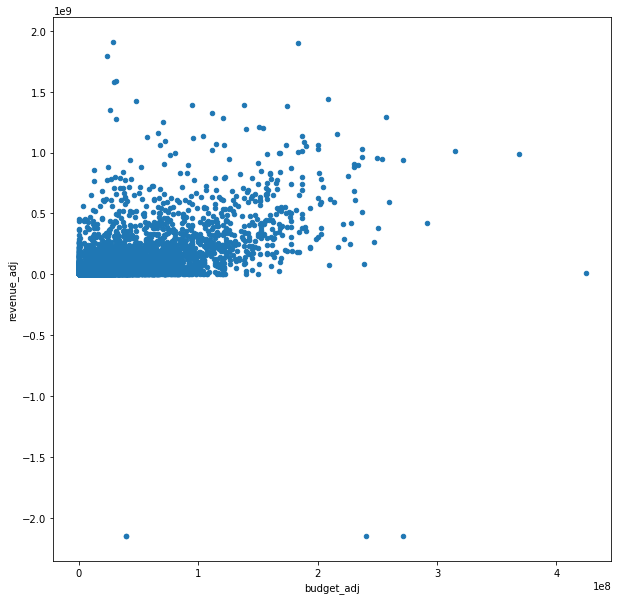

In [12]:
df1.plot(x='budget_adj',y='revenue_adj',kind='scatter',figsize=(10,10));

so you don't have to pay alot to get high revenue 

how many movies increased year by year?

In [13]:
years_area=[1960,1970,1980,1990,2000,2015]

In [14]:
area_name=['60s','70s','80s','90s','2000s']

In [15]:
df1['areas']=pd.cut(df1['release_year'],years_area,labels=area_name)
df1.head()

,popularity,original_title,cast,homepage,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,areas
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445893,2000s
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939,348161292,2000s
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101199955,271619025,2000s
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183999919,1902723130,2000s
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,174799923,1385748801,2000s


Text(0, 0.5, 'years')

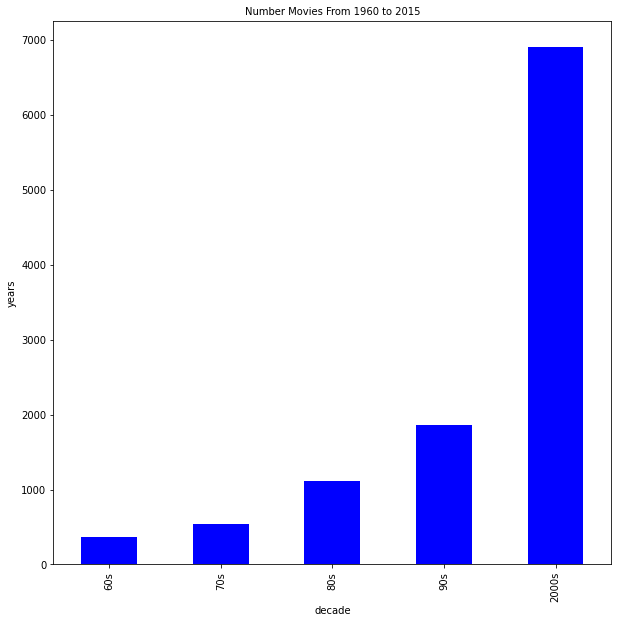

In [16]:
df1.areas.value_counts()
plt.figure(figsize=(10,10))
df1.groupby('areas')['areas'].count().plot(kind='bar',color='b')
plt.title('Number Movies From 1960 to 2015',fontsize=(10))
plt.xlabel('decade',fontsize=(10))
plt.ylabel('years',fontsize=(10))

as we can see movies are booming in 2000s

sample of most frequent movies type data is to big to draw it all

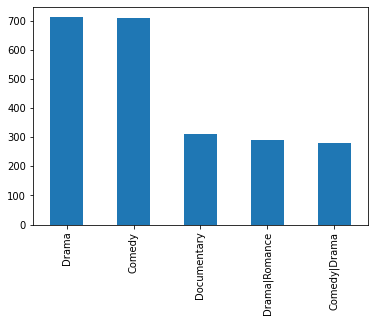

In [17]:
df1.genres.value_counts().head().plot(kind='bar');

In [18]:
area2000s=df1[df1['areas']=='2000s'].genres.head(50).value_counts()
area2000s.head()

Action|Adventure|Science Fiction|Thriller    2
Drama|Romance                                2
Action|Adventure|Science Fiction             2
Comedy                                       1
Drama|Thriller|History                       1
Name: genres, dtype: int64

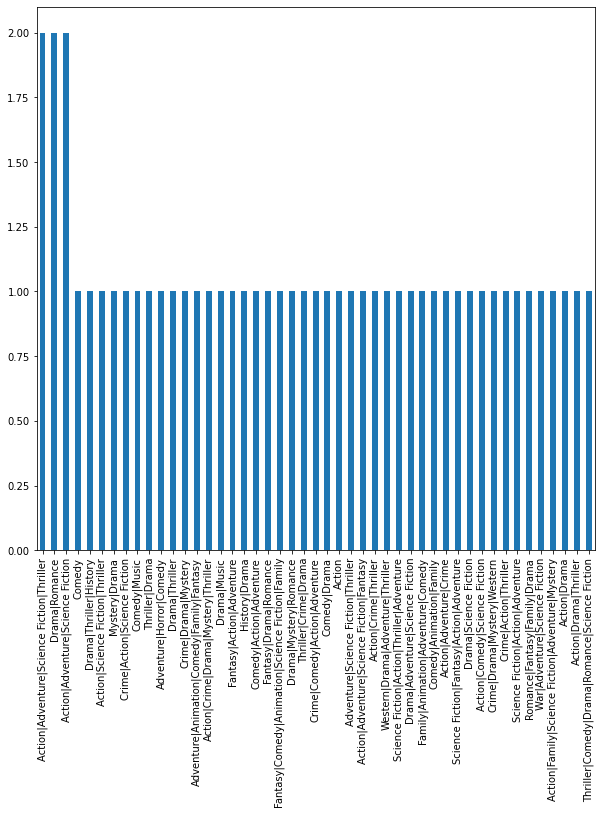

In [19]:
area2000s=df1[df1['areas']=='2000s'].genres.head(50).value_counts().plot(kind='bar',figsize=(10,10))


In [20]:
df1.runtime.describe()

count    10834.000000
mean       102.363855
std         30.948225
min          2.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

In [25]:
df1.head()

,popularity,original_title,cast,homepage,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,areas
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445893,2000s
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939,348161292,2000s
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101199955,271619025,2000s
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183999919,1902723130,2000s
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,174799923,1385748801,2000s


are movies getting longer?

Text(0.5, 1.0, 'run time across the years')

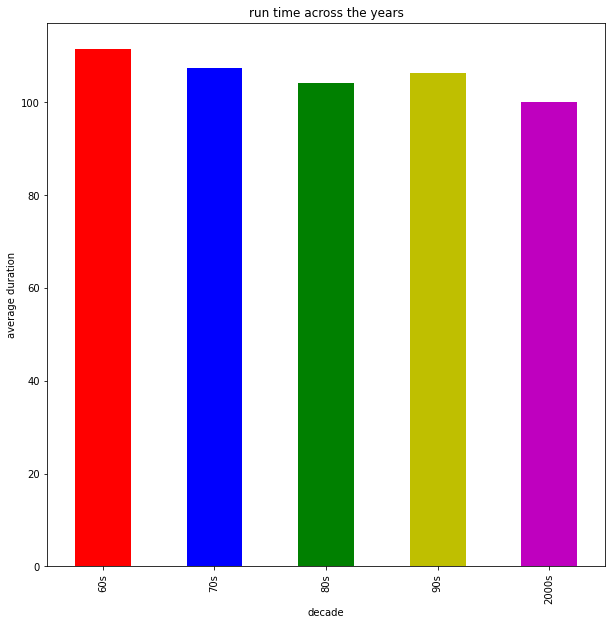

In [33]:
plt.figure(figsize=[10,10])
df1[df1['areas']=='60s'].groupby('areas').runtime.mean().plot(kind='bar',color='r')
df1[df1['areas']=='70s'].groupby('areas').runtime.mean().plot(kind='bar',color='b')
df1[df1['areas']=='80s'].groupby('areas').runtime.mean().plot(kind='bar',color='g')
df1[df1['areas']=='90s'].groupby('areas').runtime.mean().plot(kind='bar',color='y')
df1[df1['areas']=='2000s'].groupby('areas').runtime.mean().plot(kind='bar',color='m')
plt.xlabel('decade')
plt.ylabel('average duration')
plt.title('run time across the years')




<AxesSubplot:xlabel='popularity', ylabel='revenue_adj'>

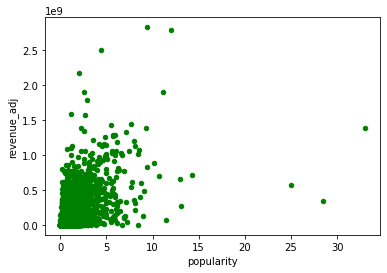

In [4]:
df1.plot(kind='scatter',x='popularity',y='revenue_adj',color='g')

no it's actually gitting a bit shorter

conclusion 

The number of movies in the last decade inscreased from the previous one, and this indicate to the investment in the movie industry highly increased in the last decade.

we found out that the most frequent type of movies along this past years is comedy and drama

movies durations actually getting shorter by time 

limitation


no relation between popularity and revenue